# Projet Deep Learning

## Imports

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import json
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, Xception
from tensorflow.keras.optimizers import Adam

In [2]:
# Vérifier la version de TensorFlow
print("TensorFlow version:", tf.__version__)

# Téléchargement et extraction des données
data_dir = 'Fish.v1-416x416.tensorflow'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Analyse exploratoire des données (EDA)
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))
num_valid_images = len(os.listdir(valid_dir))

print("Nombre d'images dans le dossier d'entraînement:", num_train_images)
print("Nombre d'images dans le dossier de test:", num_test_images)
print("Nombre d'images dans le dossier de validation:", num_valid_images)


TensorFlow version: 2.15.0
Nombre d'images dans le dossier d'entraînement: 945
Nombre d'images dans le dossier de test: 137
Nombre d'images dans le dossier de validation: 271


Exemples d'images dans le dossier d'entraînement:


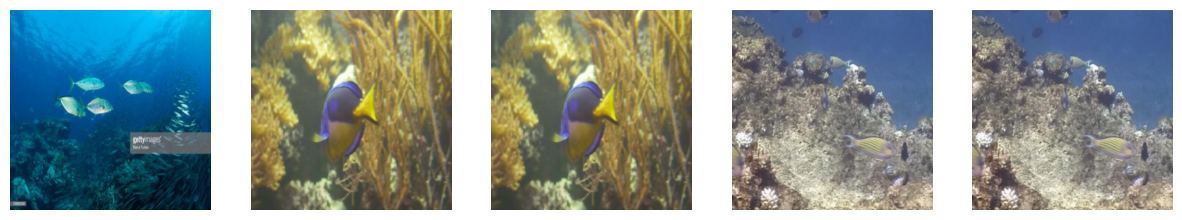

Exemples d'images dans le dossier de test:


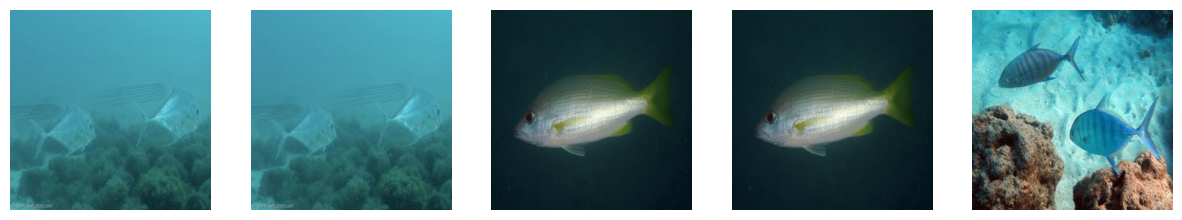

Exemples d'images dans le dossier de validation:


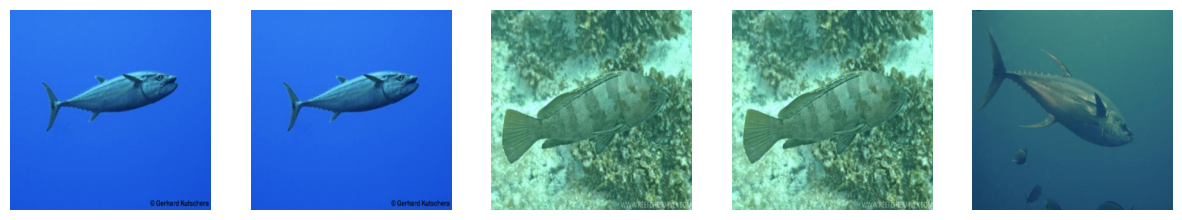

In [3]:
def display_images(directory, num_images=5):
    images = os.listdir(directory)
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        img_path = os.path.join(directory, images[i])
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

# Afficher des exemples d'images pour chaque ensemble de données
print("Exemples d'images dans le dossier d'entraînement:")
display_images(train_dir)

print("Exemples d'images dans le dossier de test:")
display_images(test_dir)

print("Exemples d'images dans le dossier de validation:")
display_images(valid_dir)


## 1. Classification

In [4]:
def crop_images(initial_directory, destination):
    # Charger les annotations à partir du fichier CSV
    annotations_file = '_annotations.csv'
    annotations_df = pd.read_csv(os.path.join(initial_directory, annotations_file))

    # Parcourir les annotations
    for index, row in annotations_df.iterrows():
        # Charger l'image correspondante
        image_path = os.path.join(initial_directory, row['filename'])
        image = cv2.imread(image_path)

        # Vérifier si l'image a été chargée avec succès
        if image is None:
            print(f"Impossible de charger l'image: {image_path}")
            continue

        # Récupérer les coordonnées du rectangle annoté
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        # Cropper l'image selon le rectangle annoté
        cropped_image = image[ymin:ymax, xmin:xmax]

        # Vérifier si l'image croppée est valide
        if cropped_image.size == 0 or cropped_image.shape[0] == 0 or cropped_image.shape[1] == 0:
            print(f"Image croppée invalide pour l'image: {image_path}")
            continue

        # Trouver la classe annotée (l'espèce de poisson)
        class_name = row['class']

        # Préparer le dossier de sauvegarde
        save_dir = os.path.join(destination, class_name)
        os.makedirs(save_dir, exist_ok=True)

        # Construire un nom de fichier unique pour éviter les écrasements
        base_filename, file_extension = os.path.splitext(row['filename'])
        unique_filename = f"{base_filename}_{index}{file_extension}"
        save_path = os.path.join(save_dir, unique_filename)

        # Sauvegarder l'image croppée
        cv2.imwrite(save_path, cropped_image)
        print(f"Image croppée et sauvegardée: {save_path}")

crop_images(train_dir, "cropped_train_images")
crop_images(test_dir, "cropped_test_images")
crop_images(valid_dir, "cropped_valid_images")

Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_0.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_1.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_2.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_3.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_4.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_5.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_6.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_7.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_8.jpg
Image croppée et sauvegardée: c

Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset734_png.rf.FosMuRRVL0F0k2249lKA_82.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_83.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_84.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_85.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_86.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_87.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_88.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_89.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset48_png.rf.DwuBrcmk5pE0asszdhcE_90.jpg
Image croppée et sauvegardée: 

Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset646_png.rf.HwzaehVtRT0KQYO8jRF2_168.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset438_png.rf.IHbg1USnEMwR4arbbJTa_169.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset438_png.rf.IHbg1USnEMwR4arbbJTa_170.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset57_png.rf.ILD4ggJhQHQNDcSnwIY5_171.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset57_png.rf.ILD4ggJhQHQNDcSnwIY5_172.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset320_png.rf.JlSghslN0h6NKS7natVb_173.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset92_png.rf.IRwy5rmKBRpyklxRuLfW_174.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset678_png.rf.HhDvrjK8Pzz65icMaJV4_175.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset678_png.rf.HhDvrjK8Pzz65icMaJV4_176.jpg
Image croppée et

Image croppée et sauvegardée: cropped_train_images\jack\FishDataset457_png.rf.Nv5CGscWT2BVsvyN50zP_253.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset190_png.rf.LGN4IBpqePh377HPQNhj_254.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_255.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_256.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_257.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_258.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_259.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_260.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset4_png.rf.JupGrExXsj939syU1WXp_261.jpg
Image croppée et sauvegardée: 

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset540_png.rf.ShOQSitvkVN4m7uAE7KW_350.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset148_png.rf.Ub82tnjCQCPt1AFx0G20_351.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset728_png.rf.UwssM8hlwFVgMWfqQJPz_352.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset728_png.rf.UwssM8hlwFVgMWfqQJPz_353.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset235_png.rf.T0CR5WkALKZzOb3yrhLo_354.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_355.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_356.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_357.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset335_png.rf.U6aIT7qvfU9ePslUSOyh_358.jpg
Image cropp

Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset542_png.rf.a476f69e8be4b461262b4870f316a299_422.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset343_png.rf.a3d72480eeadda2c7de8209579bd695b_423.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset691_png.rf.a15aa0b4aeaed9e4dd7383c02ade32ad_424.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset218_png.rf.a43441767febfc23a054119387d6c529_425.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_426.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_427.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset437_png.rf.a672a93409e9342b919337a5a9247573_428.jpg
Image croppée et sauvegardée: cropped_train_images\

Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_498.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_499.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_500.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_501.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset118_png.rf.awXAF10xQUww4Q7Xpz1u_502.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset611_png.rf.b43a283742bd3dc0e8b99bfd885dfd4d_503.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset449_png.rf.b4766c5a3057091babc837225f915021_504.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset449_png.rf.b4766c5a3057091babc837225f915021_505.jpg
Image croppée et sauvegardée: cropped_trai

Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset91_png.rf.02dc3f5fb2f75f1f83305f4c4b95b2ff_568.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset519_png.rf.013d3a2ae4fc980d3c24bc1640cc7e54_569.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset422_png.rf.06390f476820a78df6e8a570672b4588_570.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_571.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_572.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_573.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset498_png.rf.060887c1b252fe467346a3f0bd986688_574.jpg
Image croppée et sauvegardée: cropped_trai

Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset722_png.rf.1332583f54f1f09dbacee8b2008714f2_656.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset722_png.rf.1332583f54f1f09dbacee8b2008714f2_657.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset120_png.rf.161135b9d2d8ae9971a609b7bb6bf5a5_658.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset145_png.rf.10bec3f724763535c74bd3c6830c0cf6_659.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset355_png.rf.16be81271625b501ce59e7a2d9880f58_660.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset612_png.rf.1832627bc169e0af0323250a715819fa_661.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset129_png.rf.14a9b10dc9c8b3cc5690f3838842c4b4_662.jpg
Image croppée et sauvegardée: cropped_train_i

Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_754.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_755.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_756.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset644_png.rf.2d2fc0416d30fac9fc93b59bb8dc69ec_757.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset497_png.rf.2d4e80963d2f55dfcef9932529d34458_758.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset497_png.rf.2d4e80963d2f55dfcef9932529d34458_759.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset667_png.rf.2e566b5f45c4336fc7e7161e509f1dbf_760.jpg
Image croppée et sauvegardée: cropped_train_imag

Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset433_png.rf.uEgPfdVyLrImxBha1Qxx_834.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset398_png.rf.vKbaeczu9SEX221RUs0o_835.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset673_png.rf.vgafWNRzeVGCudHAbx9h_836.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset673_png.rf.vgafWNRzeVGCudHAbx9h_837.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset673_png.rf.vgafWNRzeVGCudHAbx9h_838.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset616_png.rf.vFlqLNDZ3gTM9eJgOgTN_839.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset526_png.rf.vdApYe7VrTvO4jMGPB4p_840.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset519_png.rf.t16JxYfN0rjpg0drLVxI_841.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset696_png.rf.tPXyYC9QdLAHLEY8zF4g_842.jpg
Image croppée et

Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset488_png.rf.xZBL77EB47tqViOJTLNK_916.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset488_png.rf.xZBL77EB47tqViOJTLNK_917.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset488_png.rf.xZBL77EB47tqViOJTLNK_918.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset427_png.rf.xfX3u3ZFmv2Dixrdpi65_919.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset611_png.rf.zubQkzoc2znL6mDZjYj3_920.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset385_png.rf.z9ELv47DWqJtd8QrYVi8_921.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset83_png.rf.2w6MmJ6t25XSCXgJPvm0_922.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset83_png.rf.2w6MmJ6t25XSCXgJPvm0_923.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset228_png.rf.2foRw6luApoKN7fjqEho_924.jpg
Image croppée et sauvegar

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset405_png.rf.3ommDahzAaVK5jVOkqvN_998.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset540_png.rf.42606cf2cb7265fe0f493b65a3e4e82c_999.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset25_png.rf.4532362c361066a588637c6cf4699dd0_1000.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset260_png.rf.3ec15b1fc078f73850d4a07a45d5b764_1001.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset131_png.rf.449eb614f56091c49cebd7dca309cd59_1002.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset131_png.rf.449eb614f56091c49cebd7dca309cd59_1003.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset131_png.rf.449eb614f56091c49cebd7dca309cd59_1004.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishD

Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset627_png.rf.5480c04327a677ba546b4325fd4ea63a_1072.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset31_png.rf.58df19c82cb0a52e01c3c66e25f82467_1073.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset92_png.rf.547b908f9db39a64f54e6105dddbc847_1074.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset725_png.rf.54b0a3f4cdb9c66119a9f6ad6ff8c29c_1075.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset725_png.rf.54b0a3f4cdb9c66119a9f6ad6ff8c29c_1076.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset274_png.rf.58ea47fe8d57243e3e2e5053b898f746_1077.jpg
Image croppée et sauvegardée: cropped_train_images\Ephippidae -Spadefishes-\FishDataset274_png.rf.58ea47fe8d57243e3e2e5053b898f746_1078.jpg
Image croppée et sauvegardée: cropped_train_im

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset142_png.rf.649143cedb7ffa6f9bdd99a556728fff_1171.jpg
Image croppée et sauvegardée: cropped_train_images\Shark -Selachimorpha-\FishDataset293_png.rf.69ab032822d43f023c50a0375a614eb5_1172.jpg
Image croppée et sauvegardée: cropped_train_images\Serranidae -Groupers-\FishDataset307_png.rf.63f392ededab8a787bef64841892a336_1173.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset208_png.rf.686848bfb6574ddb9b2b7328db3a44aa_1174.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset664_png.rf.6B4usimEHJdfXRGjqSOg_1175.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset735_png.rf.68FXQNEGiyA39B1Qvdd9_1176.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1177.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset42_

Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1252.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1253.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1254.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1255.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1256.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset255_png.rf.75639fe6e1231f7addc288e21aea8073_1257.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset314_png.rf.6fba016674b32ef5a4f17243829f1fa3_1258.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae 

Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset159_png.rf.7cde47c1287bb6e89c3c35840bed1e4c_1328.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset294_png.rf.7b121b6511f4180aa056edcc5e083a4c_1329.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset294_png.rf.7b121b6511f4180aa056edcc5e083a4c_1330.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset72_png.rf.7tcZnEXmfQfL9WQE5Sw3_1331.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset71_png.rf.7WjuTQe1oqOBh1pwU3cC_1332.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset680_png.rf.7t7O6Znh0KsX9v5PXk25_1333.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset100_png.rf.7d24ba5eb55a0068d0985f29cc437b36_1334.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset26_png.rf.746aaf13838e84f2072f36d0d89e

Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1405.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1406.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1407.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset303_png.rf.8c9444adfb0a68fdaf5afc606086fb55_1408.jpg
Image croppée et sauvegardée: cropped_train_images\grouper\FishDataset694_png.rf.8GJaASIyVqhH2NuzI550_1409.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset346_png.rf.8cddd70279bbf213842d9fc99683f606_1410.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset263_png.rf.84235f0554ca1449f75c7cb5bc9acc6b_1411.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDatas

Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1497.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1498.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1499.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset111_png.rf.9cqWbl94l3V8aOiIujR4_1500.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset365_png.rf.9jyaCTFImZ4SZ5OIWX9t_1501.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset365_png.rf.9jyaCTFImZ4SZ5OIWX9t_1502.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset365_png.rf.9jyaCTFImZ4SZ5OIWX9t_1503.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset703_png.rf.bXO9EjKGYzP4GyVgfDtC_1504.jpg
Image croppée et sauvegardée: cropped_train_images\snapper\FishDataset703_png.rf.bXO9EjKGYzP4GyVgfDtC_1505.jpg
Image crop

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1581.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1582.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1583.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset77_png.rf.ce19a2ed408ab5262a009729d3e19a50_1584.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset152_png.rf.ce96ac1e078df1451c6ea679195835a2_1585.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset664_png.rf.cf775648f11b292cf594a9edaf568f1e_1586.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset658_png.rf.c9c4d9d5691f3254e87bcbc6136dc73e_1587.jpg
Image croppée et s

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1664.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1665.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1666.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1667.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1668.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1669.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1670.jpg

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset472_png.rf.ec24d745be73fe7470ac0e583c9281f2_1728.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset254_png.rf.eSPHtv8n7D0Cbj0mF9tJ_1729.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset254_png.rf.eSPHtv8n7D0Cbj0mF9tJ_1730.jpg
Image croppée et sauvegardée: cropped_train_images\Scaridae -Parrotfishes-\FishDataset591_png.rf.ec75c2f71138cd373e8da5d941af1a19_1731.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1732.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1733.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1734.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1735.jpg
Image croppée et sauvegardée: cropped_train_images\

Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset638_png.rf.etoHMNiI9tFD5lw5tAZw_1800.jpg
Image croppée et sauvegardée: cropped_train_images\Scombridae -Tunas-\FishDataset192_png.rf.ecfae86d5f9009e205be2bb83de0e21b_1801.jpg
Image croppée et sauvegardée: cropped_train_images\Lutjanidae -Snappers-\FishDataset360_png.rf.f84d5710cf746220ea5d249bef4dde76_1802.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1803.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1804.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1805.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1806.jpg
Image croppée et sauvegardée: cropped_train_images\Carangidae -Jacks-\FishDataset70

Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset476_png.rf.fbdff21fbaa9a7395f93de670736d049_1893.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset291_png.rf.iATkApPga3LxIHvuok1G_1894.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset45_png.rf.fu6bXxDTdxT9MdMjM1db_1895.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset604_png.rf.hhkVhHGnovR87uJAIRJs_1896.jpg
Image croppée et sauvegardée: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset67_png.rf.f88b948c0332247a3b0756c6d621c1ca_1897.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset168_png.rf.iIw8zl88N8oVCyamWdlk_1898.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset168_png.rf.iIw8zl88N8oVCyamWdlk_1899.jpg
Image croppée et sauvegardée: cropped_train_images\surgeon\FishDataset168_png.rf.iIw8zl88N8oVCyamWdlk_1900.jpg
Image croppée et sauvegardée: cropped_train_images\surg

Image croppée et sauvegardée: cropped_train_images\jack\FishDataset582_png.rf.mHDumVDFBc5OZyYJjyrg_1982.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset582_png.rf.mHDumVDFBc5OZyYJjyrg_1983.jpg
Image croppée et sauvegardée: cropped_train_images\tuna\FishDataset344_png.rf.jnmVQlefU9GiJC1sZg5r_1984.jpg
Image croppée et sauvegardée: cropped_train_images\parrot\FishDataset329_png.rf.l1rfvkTDyFsHIIynK4WE_1985.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset219_png.rf.ljdQgLG79J1P2rqWj35a_1986.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset688_png.rf.lUL7egJT6TQzPe4vqinM_1987.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset11_png.rf.lhkWaztcC06eHpeXUekm_1988.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset11_png.rf.lhkWaztcC06eHpeXUekm_1989.jpg
Image croppée et sauvegardée: cropped_train_images\jack\FishDataset11_png.rf.lhkWaztcC06eHpeXUekm_1990.jpg
Image croppée et sauvegardée

Image croppée et sauvegardée: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2073.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2074.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2075.jpg
Image croppée et sauvegardée: cropped_train_images\shark\FishDataset312_png.rf.q4WnsPrz41Sr7yvg45vR_2076.jpg
Image croppée et sauvegardée: cropped_test_images\Lutjanidae -Snappers-\FishDataset285_png.rf.30b2d9af784724227bfe722520b8cf91_0.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset650_png.rf.0a14f4401f6beedde7c2807f49850098_1.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset650_png.rf.0a14f4401f6beedde7c2807f49850098_2.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset97_png.rf.0bb11163a08456dfaf69c8cfa24877e7_3.jpg
Image croppée et sauvegardée: cr

Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset618_png.rf.6f00c98d79be2d06f4d302d8d27bdb81_68.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset618_png.rf.6f00c98d79be2d06f4d302d8d27bdb81_69.jpg
Image croppée et sauvegardée: cropped_test_images\Shark -Selachimorpha-\FishDataset489_png.rf.7491ed4407e4ba7af1a8ec418e8ed23f_70.jpg
Image croppée et sauvegardée: cropped_test_images\jack\FishDataset618_png.rf.7BVZZwyPeU1Jx2KvwSIj_71.jpg
Image croppée et sauvegardée: cropped_test_images\jack\FishDataset618_png.rf.7BVZZwyPeU1Jx2KvwSIj_72.jpg
Image croppée et sauvegardée: cropped_test_images\Shark -Selachimorpha-\FishDataset508_png.rf.77473a5edb1e3e4dfcadd14806734842_73.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset238_png.rf.91f7386105c8eb06b5336d71d43dde86_74.jpg
Image croppée et sauvegardée: cropped_test_images\Scombridae -Tunas-\FishDataset238_png.rf.91f7386105c8eb06b5336d71d43dde86_75.jp

Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_156.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_157.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_158.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_159.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_160.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_161.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset441_png.rf.a3871c7df1f3d97c9df4f0a8d9071449_162.jpg
Image 

Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_221.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_222.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_223.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_224.jpg
Image croppée et sauvegardée: cropped_test_images\Carangidae -Jacks-\FishDataset534_png.rf.e5fb5b7180b7522ef1c7ccfb07414e18_225.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_226.jpg
Image croppée et sauvegardée: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_227.jpg
Image croppée et sauvegardée: cropped_test_images\Acanth

Image croppée et sauvegardée: cropped_test_images\jack\FishDataset531_png.rf.kzb7s1Jqu5op3ZWPU4kZ_326.jpg
Image croppée et sauvegardée: cropped_test_images\jack\FishDataset531_png.rf.kzb7s1Jqu5op3ZWPU4kZ_327.jpg
Image croppée et sauvegardée: cropped_test_images\parrot\FishDataset245_png.rf.m04phkDbP33LYUfcFRie_328.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_329.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_330.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_331.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_332.jpg
Image croppée et sauvegardée: cropped_test_images\surgeon\FishDataset97_png.rf.paAi5x2V9rw0Ocph7DiQ_333.jpg
Image croppée et sauvegardée: cropped_test_images\tuna\FishDataset374_png.rf.qQaKOi97VokjlhJ6HV4I_334.jpg
Image croppée et sauvegardée: crop

Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_0.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_1.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_2.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset609_png.rf.bb8f98e0c8285221186b5ae35dcdfffd_3.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset156_png.rf.ba1045c5373f2fa6478c1f221cb264f2_4.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset156_png.rf.ba1045c5373f2fa6478c1f221cb264f2_5.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset156_png.rf.ba1045c5373f2fa6478c1f221cb264f2_6.jpg
Image croppée et sauvegardée: cropped_valid

Image croppée et sauvegardée: cropped_valid_images\grouper\FishDataset193_png.rf.csozALv18G7HKMiXj4Dn_82.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset339_png.rf.d517190a997a74cddcf2f2926db14566_83.jpg
Image croppée et sauvegardée: cropped_valid_images\Scombridae -Tunas-\FishDataset324_png.rf.f96fc8301bcd8a63bbd03ecb7e243fb0_84.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_85.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_86.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_87.jpg
Image croppée et sauvegardée: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset445_png.rf.ffdcc3a1275361fb91b5ac13d634ed5a_88.jpg
Image croppée et sauvegardée: cropped_valid_images\Acant

Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset712_png.rf.nDn7OcBRjqIhY7Uy0xRH_162.jpg
Image croppée et sauvegardée: cropped_valid_images\tuna\FishDataset170_png.rf.s1Q08ts6mLLwGwFwvwfe_163.jpg
Image croppée et sauvegardée: cropped_valid_images\snapper\FishDataset393_png.rf.rrhMSU1b5YmOcL7A7kVd_164.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_165.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_166.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_167.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_168.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset186_png.rf.f5c9ea8d8497595d311880843a21c808_169

Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset439_png.rf.0e7837b018b9df0eff54a1a4dbc05e7f_259.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset390_png.rf.0daec7315f7a85190a1d6f1208e973c2_260.jpg
Image croppée et sauvegardée: cropped_valid_images\parrot\FishDataset470_png.rf.0c15RffHRccy8NvXwvPI_261.jpg
Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset661_png.rf.0zMvYqHtLcp30F3PtWfr_262.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset464_png.rf.00747c003901008c458ea255ef82af2c_263.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset711_png.rf.05b73cd73241679555363b0664d62389_264.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset711_png.rf.05b73cd73241679555363b0664d62389_265.jpg
Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset711_png.rf.05b73cd7

Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset396_png.rf.1a7d5f80f09954afee3d5a4b5c3ebb8a_341.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_342.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_343.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_344.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_345.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_346.jpg
Image croppée et sauvegardée: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_347.jpg
Image croppée et sauvegardée: cropped_valid_imag

Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_432.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_433.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_434.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset408_png.rf.7ada800414e2ba20795be9673276ccc5_435.jpg
Image croppée et sauvegardée: cropped_valid_images\grouper\FishDataset622_png.rf.7MGByjmrrVr6WXlyunff_436.jpg
Image croppée et sauvegardée: cropped_valid_images\jack\FishDataset538_png.rf.3tQSGJ0lUoZk8t0P2gYf_437.jpg
Image croppée et sauvegardée: cropped_valid_images\Carangidae -Jacks-\FishDataset687_png.rf.80102f4eb256aa4ad17b301a21a5edf4_438.jpg
Image croppée et sauvegardée: cropped_valid_images\Shark -Selachimorpha-\FishDataset66_png.rf.815cf8f59770062a4c137c8c

Image croppée et sauvegardée: cropped_valid_images\Serranidae -Groupers-\FishDataset623_png.rf.9350ff918e188c42985a60ffe0ad317e_503.jpg
Image croppée et sauvegardée: cropped_valid_images\grouper\FishDataset389_png.rf.Ef8d9vNsA6Q1OjBxQHcc_504.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_505.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_506.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_507.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_508.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_509.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrlL5T9gjY_510.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset256_png.rf.9YsIDjniiGkrl

Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_579.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_580.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_581.jpg
Image croppée et sauvegardée: cropped_valid_images\surgeon\FishDataset230_png.rf.UqqLWgp11OxexAfojhkX_582.jpg
Image croppée et sauvegardée: cropped_valid_images\jack\FishDataset448_png.rf.AFzqWy6XzaBV5WrEHsZC_583.jpg
Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset511_png.rf.Iy4i98WYknzLP3FEcEND_584.jpg
Image croppée et sauvegardée: cropped_valid_images\snapper\FishDataset339_png.rf.OaYV1VJV24oPSXg3Bebt_585.jpg
Image croppée et sauvegardée: cropped_valid_images\shark\FishDataset56_png.rf.OGRe3qJnJrfYCT9zBXPl_586.jpg
Image croppée et sauvegardée: cropped_valid_images\grouper\FishDataset628_png.rf.JoBvRaOonLa5bzCJVxQF_587.jpg
Image croppée et s

In [5]:
#  Préparation des données pour l'entraînement

# Chemin vers le dossier contenant les images croppées
base_dir = 'cropped_train_images'

# Création des générateurs d'images (mais sans augmentation de données) pour l'entraînement
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  # Utilisation de 20% des données pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Défini pour l'entraînement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Défini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


In [6]:
# Définir le modèle (la dernière couche correspond au nombre de classes)
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiler le modèle
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [7]:
# Entraînement du modèle
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du modèle

val_loss, val_acc = model1.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

Epoch 1/50


52/52 [==============================] - 23s 414ms/step - loss: 2.6963 - accuracy: 0.1460 - val_loss: 2.3658 - val_accuracy: 0.1823
Epoch 2/50
52/52 [==============================] - 14s 275ms/step - loss: 2.4191 - accuracy: 0.1857 - val_loss: 2.2112 - val_accuracy: 0.2292
Epoch 3/50
52/52 [==============================] - 16s 310ms/step - loss: 2.2523 - accuracy: 0.2382 - val_loss: 2.1559 - val_accuracy: 0.2578
Epoch 4/50
52/52 [==============================] - 17s 335ms/step - loss: 2.1020 - accuracy: 0.2621 - val_loss: 2.0851 - val_accuracy: 0.2682
Epoch 5/50
52/52 [==============================] - 16s 315ms/step - loss: 1.9898 - accuracy: 0.2657 - val_loss: 2.0562 - val_accuracy: 0.2682
Epoch 6/50
52/52 [==============================] - 17s 325ms/step - loss: 1.7845 - accuracy: 0.3262 - val_loss: 2.0186 - val_accuracy: 0.2734
Epoch 7/50
52/52 [==============================] - 16s 310ms/step - loss: 1.6497 - accuracy: 0.3305 - val_loss: 2.1546 - val_accuracy: 0.25

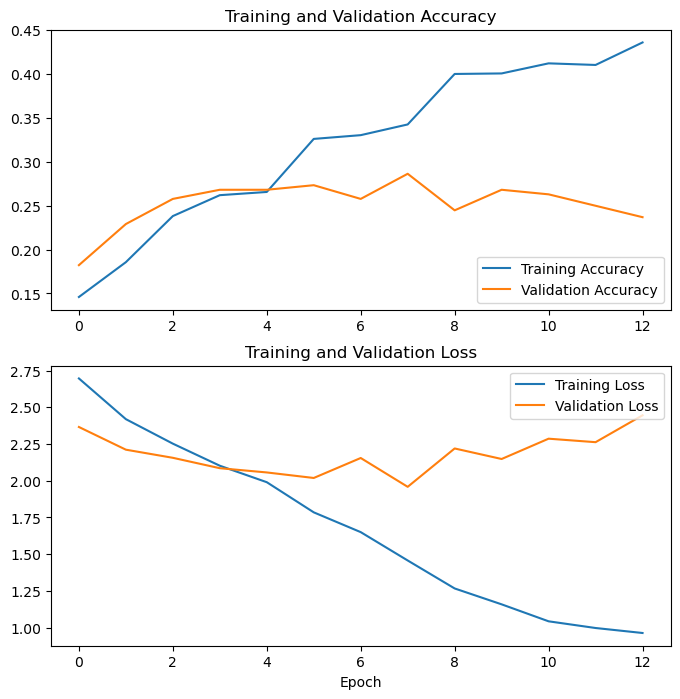

In [8]:
# Visualisation des résultats de l'entraînement

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


💬 Remarque :

- Le modèle est sous-performant en ce qui concerne la précision, qui se situe autour de 25-30%. Cela suggère que le modèle a du mal à apprendre efficacement à partir des données.

- Apprentissage Stable : Malgré la faible précision, l'amélioration constante au fil des époques suggère que le modèle apprend. La tendance à la baisse de la perte soutient cela, bien que cela indique qu'il y a une marge significative d'amélioration.

- Sous-apprentissage Potentiel : Étant donné la faible précision et la perte élevée, le modèle pourrait sous-apprendre le jeu de données. Cela pourrait être dû à une complexité de modèle insuffisante, à un temps d'entraînement inadéquat ou à une extraction de caractéristiques sous-optimale.

- Tendances de Formation et de Validation Proches : Les lignes de formation et de validation pour la précision et la perte sont relativement proches, ce qui est généralement un bon signe. Cependant, dans ce contexte, cela indique probablement que le modèle sous-apprend également sur les deux ensembles de données.

## 2. Transfert Learning

#### VGG16 model

In [9]:
# Charger le modèle pré-entraîné VGG16 avec les poids ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du modèle VGG16 pour empêcher l'entraînement
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées au modèle
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Créer un nouveau modèle en spécifiant les entrées et les sorties
model_transfer_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compiler le modèle avec un optimiseur Adam
model_transfer_vgg16.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Afficher le résumé du modèle
model_transfer_vgg16.summary()

# Entraîner le modèle avec les données d'entraînement
history_transfer = model_transfer_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du modèle transféré
val_loss_transfer, val_acc_transfer = model_transfer_vgg16.evaluate(
    validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss_transfer}, Validation accuracy: {val_acc_transfer}')




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

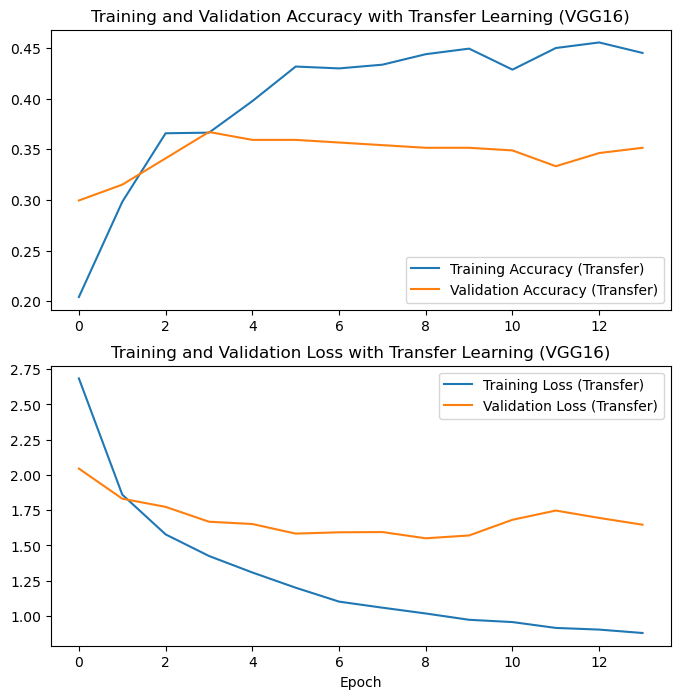

In [10]:
# Visualisation des résultats de l'entraînement avec transfert d'apprentissage
acc_transfer = history_transfer.history['accuracy']
val_acc_transfer = history_transfer.history['val_accuracy']
loss_transfer = history_transfer.history['loss']
val_loss_transfer = history_transfer.history['val_loss']

epochs_transfer = range(len(acc_transfer))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer, acc_transfer, label='Training Accuracy (Transfer)')
plt.plot(epochs_transfer, val_acc_transfer, label='Validation Accuracy (Transfer)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (VGG16)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer, loss_transfer, label='Training Loss (Transfer)')
plt.plot(epochs_transfer, val_loss_transfer, label='Validation Loss (Transfer)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (VGG16)')
plt.xlabel('Epoch')
plt.show()

### Comparaison des performances des deux modèles

12/12 [==============================] - 1s 81ms/step - loss: 1.9519 - accuracy: 0.2839
Validation loss (Scratch): 1.9519487619400024, Validation accuracy (Scratch): 0.2838541567325592
12/12 [==============================] - 21s 2s/step - loss: 1.5457 - accuracy: 0.3464
Validation loss (Transfer): 1.5457078218460083, Validation accuracy (Transfer): 0.3463541567325592


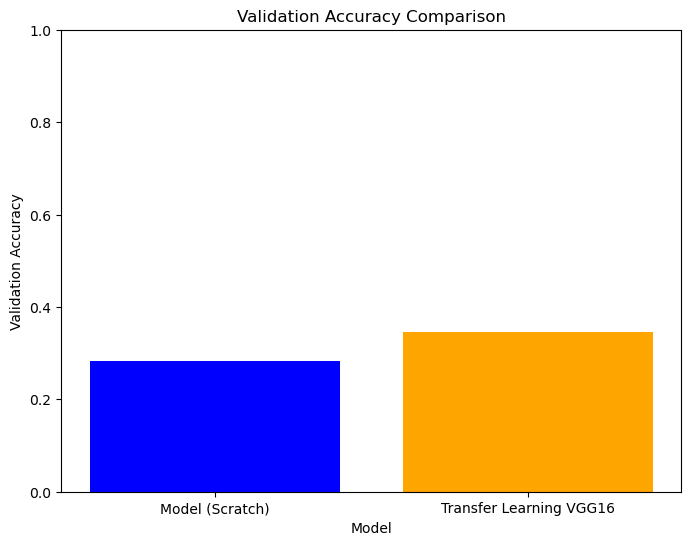

In [11]:
# Evaluation du modèle entraîné à partir de zéro
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                    steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du modèle transféré
val_loss_transfer, val_acc_transfer = model_transfer_vgg16.evaluate(
    validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des résultats de comparaison

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning VGG16'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### ResNet50 model

In [12]:
# Charger le modèle pré-entraîné ResNet50 avec les poids ImageNet
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du modèle ResNet50 pour empêcher l'entraînement
for layer in base_model_resnet.layers:
    layer.trainable = False

# Ajouter des couches personnalisées au modèle ResNet50
x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(512, activation='relu')(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
predictions_resnet = Dense(len(train_generator.class_indices), activation='softmax')(x_resnet)

# Créer un nouveau modèle en spécifiant les entrées et les sorties
model_transfer_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compiler le modèle avec un optimiseur Adam
model_transfer_resnet.compile(optimizer=Adam(),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

# Entraîner le modèle avec les données d'entraînement
history_transfer_resnet = model_transfer_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 62s 1s/step - loss: 3.8881 - accuracy: 0.0825 - val_loss: 2.6805 - val_accuracy: 0.1250
Epoch 2/50
52/52 [==============================] - 71s 1s/step - loss: 2.8349 - accuracy: 0.1081 - val_loss: 2.6068 - val_accuracy: 0.0964
Epoch 3/50
52/52 [==============================] - 70s 1s/step - loss: 2.7456 - accuracy: 0.1155 - val_loss: 2.6333 - val_accuracy: 0.1276
Epoch 4/50
52/52 [==============================] - 70s 1s/step - loss: 2.7040 - accuracy: 0.1057 - val_loss: 2.5600 - val_accuracy: 0.1354
Epoch 5/50
52/52 [==============================] - 69s 1s/step - loss: 2.6733 - accuracy: 0.1216 - val_loss: 2.5526 - val_accuracy: 0.1328
Epoch 6/50
52/52 [==============================] - 71s 1s/step - loss: 2.6495 - accuracy: 0.1292 - val_loss: 2.5537 - val_accuracy: 0.1328
Epoch 7/50
52/52 [==============================] - 69s 1s/step - loss: 2.6621 - accuracy: 0.1179 - val_loss: 2.5512 - val_accuracy: 0.1276
Epoch 8/50
52/52 [==

12/12 [==============================] - 12s 990ms/step - loss: 2.5074 - accuracy: 0.1328
Validation loss (ResNet50): 2.5074284076690674, Validation accuracy (ResNet50): 0.1328125


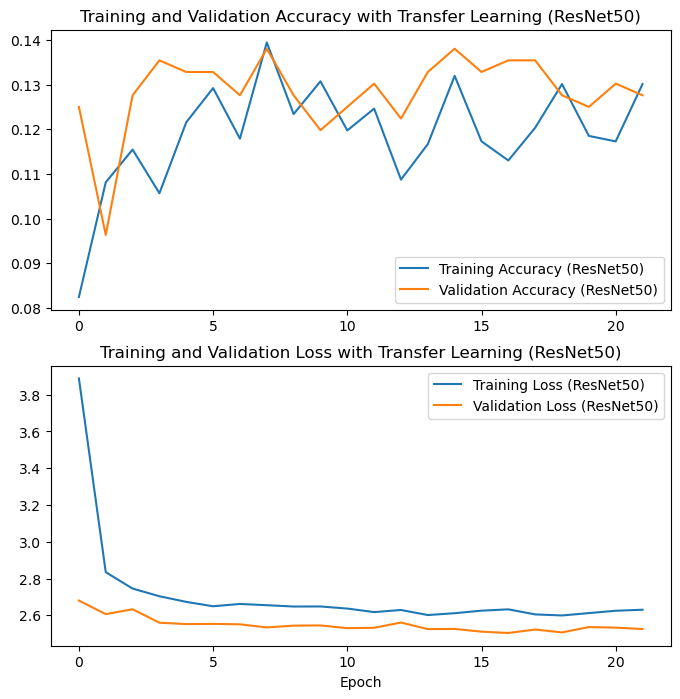

In [13]:

# Evaluation du modèle transféré ResNet50
val_loss_transfer_resnet, val_acc_transfer_resnet = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (ResNet50): {val_loss_transfer_resnet}, Validation accuracy (ResNet50): {val_acc_transfer_resnet}')

# Visualisation des résultats de l'entraînement avec transfert d'apprentissage ResNet50
acc_transfer_resnet = history_transfer_resnet.history['accuracy']
val_acc_transfer_resnet = history_transfer_resnet.history['val_accuracy']
loss_transfer_resnet = history_transfer_resnet.history['loss']
val_loss_transfer_resnet = history_transfer_resnet.history['val_loss']

epochs_transfer_resnet = range(len(acc_transfer_resnet))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_resnet, acc_transfer_resnet, label='Training Accuracy (ResNet50)')
plt.plot(epochs_transfer_resnet, val_acc_transfer_resnet, label='Validation Accuracy (ResNet50)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (ResNet50)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_resnet, loss_transfer_resnet, label='Training Loss (ResNet50)')
plt.plot(epochs_transfer_resnet, val_loss_transfer_resnet, label='Validation Loss (ResNet50)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (ResNet50)')
plt.xlabel('Epoch')
plt.show()

### Comparaison

12/12 [==============================] - 2s 121ms/step - loss: 1.9222 - accuracy: 0.2891
Validation loss (Scratch): 1.9221891164779663, Validation accuracy (Scratch): 0.2890625
12/12 [==============================] - 12s 991ms/step - loss: 2.5138 - accuracy: 0.1302
Validation loss (Transfer): 2.51375675201416, Validation accuracy (Transfer): 0.1302083283662796


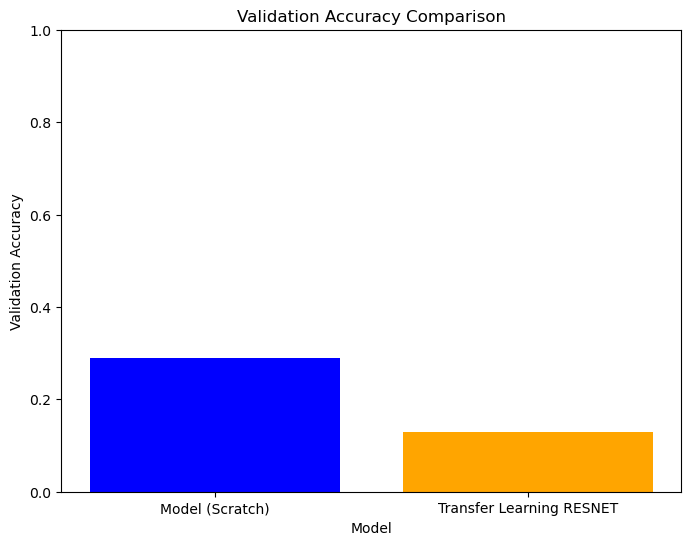

In [14]:
# Evaluation du modèle entraîné à partir de zéro
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du modèle transféré
val_loss_transfer, val_acc_transfer = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des résultats de comparaison

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning RESNET'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### InceptionV3 model

In [15]:
# Load the InceptionV3 pre-trained model with ImageNet weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the InceptionV3 model
for layer in base_model_inception.layers:
    layer.trainable = False

# Add custom layers to the InceptionV3 base model
x_inception = Flatten()(base_model_inception.output)
x_inception = Dense(512, activation='relu')(x_inception)
x_inception = Dropout(0.5)(x_inception)
predictions_inception = Dense(len(train_generator.class_indices), activation='softmax')(x_inception)

# Create the full model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Compile the InceptionV3 model
model_inception.compile(optimizer=Adam(),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the InceptionV3 model
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 46s 695ms/step - loss: 10.2438 - accuracy: 0.1698 - val_loss: 2.3855 - val_accuracy: 0.2240
Epoch 2/50
52/52 [==============================] - 34s 646ms/step - loss: 2.2992 - accuracy: 0.2529 - val_loss: 1.9566 - val_accuracy: 0.3073
Epoch 3/50
52/52 [==============================] - 34s 657ms/step - loss: 1.9872 - accuracy: 0.2767 - val_loss: 1.8948 - val_accuracy: 0.3203
Epoch 4/50
52/52 [==============================] - 34s 646ms/step - loss: 1.8250 - accuracy: 0.3158 - val_loss: 1.7943 - val_accuracy: 0.3229
Epoch 5/50
52/52 [==============================] - 34s 660ms/step - loss: 1.5861 - accuracy: 0.3372 - val_loss: 1.7662 - val_accuracy: 0.3021
Epoch 6/50
52/52 [==============================] - 34s 659ms/step - loss: 1.5130 - accuracy: 0.3476 - val_loss: 1.7434 - val_accuracy: 0.3047
Epoch 7/50
52/52 [==============================] - 34s 656ms/step - loss: 1.4854 - accuracy: 0.3476 - val_loss: 1.6856 - val_accuracy: 0.335

12/12 [==============================] - 5s 434ms/step - loss: 1.5884 - accuracy: 0.3438
Validation loss (InceptionV3): 1.5884138345718384, Validation accuracy (InceptionV3): 0.34375


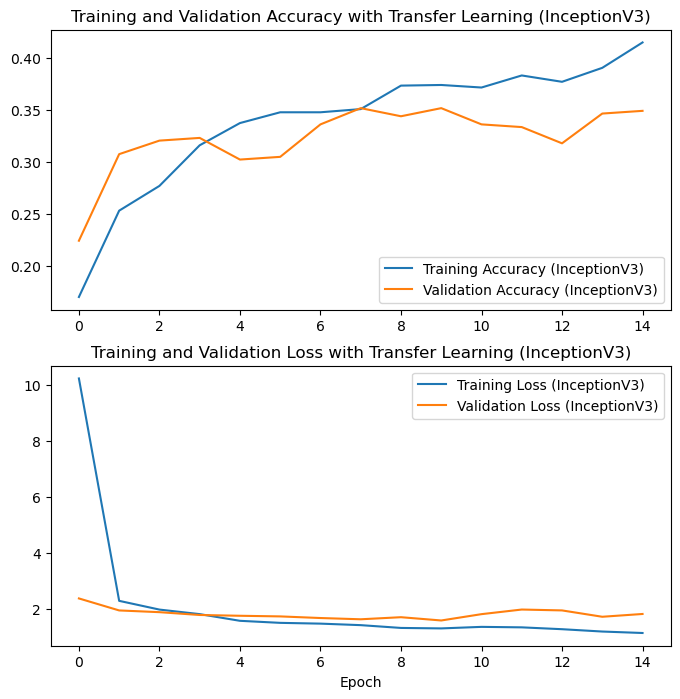

In [16]:
# Evaluation of the InceptionV3 transferred model
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (InceptionV3): {val_loss_transfer_inception}, Validation accuracy (InceptionV3): {val_acc_transfer_inception}')

# Visualization of the training results with InceptionV3 transfer learning
acc_transfer_inception = history_inception.history['accuracy']
val_acc_transfer_inception = history_inception.history['val_accuracy']
loss_transfer_inception = history_inception.history['loss']
val_loss_transfer_inception = history_inception.history['val_loss']

epochs_transfer_inception = range(len(acc_transfer_inception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_inception, acc_transfer_inception, label='Training Accuracy (InceptionV3)')
plt.plot(epochs_transfer_inception, val_acc_transfer_inception, label='Validation Accuracy (InceptionV3)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (InceptionV3)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_inception, loss_transfer_inception, label='Training Loss (InceptionV3)')
plt.plot(epochs_transfer_inception, val_loss_transfer_inception, label='Validation Loss (InceptionV3)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (InceptionV3)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 5s 430ms/step - loss: 1.6095 - accuracy: 0.3516


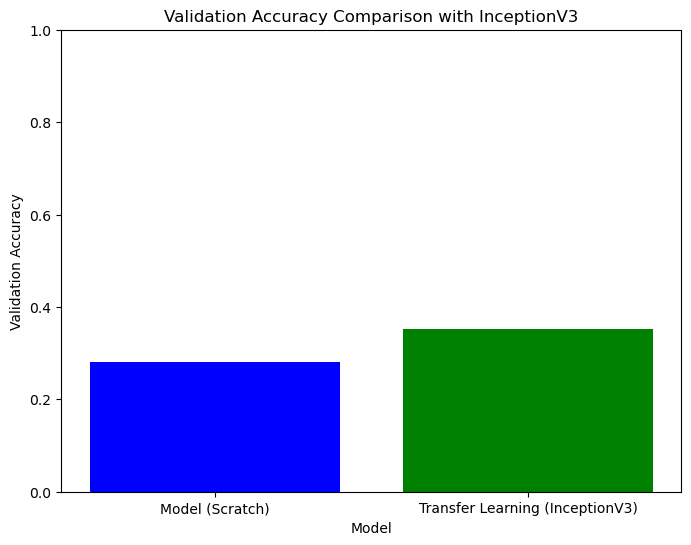

In [17]:
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                    steps=validation_generator.samples // validation_generator.batch_size)
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)

#Visualization of comparison results for InceptionV3
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (InceptionV3)'], [val_acc_scratch, val_acc_transfer_inception], color=['blue', 'green'])
plt.title('Validation Accuracy Comparison with InceptionV3')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  
plt.show()

#### Xception model

In [18]:
# Load the Xception pre-trained model with ImageNet weights
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the Xception model
for layer in base_model_xception.layers:
    layer.trainable = False

# Add custom layers to the Xception base model
x_xception = Flatten()(base_model_xception.output)
x_xception = Dense(512, activation='relu')(x_xception)
x_xception = Dropout(0.5)(x_xception)
predictions_xception = Dense(len(train_generator.class_indices), activation='softmax')(x_xception)

# Create the full model
model_xception = Model(inputs=base_model_xception.input, outputs=predictions_xception)

# Compile the Xception model
model_xception.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the Xception model
history_xception = model_xception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 77s 1s/step - loss: 9.7533 - accuracy: 0.1827 - val_loss: 2.1989 - val_accuracy: 0.3021
Epoch 2/50
52/52 [==============================] - 70s 1s/step - loss: 2.1786 - accuracy: 0.2902 - val_loss: 1.8883 - val_accuracy: 0.3151
Epoch 3/50
52/52 [==============================] - 69s 1s/step - loss: 1.7698 - accuracy: 0.3470 - val_loss: 1.8104 - val_accuracy: 0.3307
Epoch 4/50
52/52 [==============================] - 70s 1s/step - loss: 1.5555 - accuracy: 0.3818 - val_loss: 1.7521 - val_accuracy: 0.3568
Epoch 5/50
52/52 [==============================] - 73s 1s/step - loss: 1.3962 - accuracy: 0.3916 - val_loss: 1.8301 - val_accuracy: 0.3385
Epoch 6/50
52/52 [==============================] - 72s 1s/step - loss: 1.3140 - accuracy: 0.3903 - val_loss: 1.7755 - val_accuracy: 0.3333
Epoch 7/50
52/52 [==============================] - 72s 1s/step - loss: 1.2500 - accuracy: 0.3824 - val_loss: 1.6598 - val_accuracy: 0.3411
Epoch 8/50
52/52 [==

12/12 [==============================] - 12s 987ms/step - loss: 1.7078 - accuracy: 0.3516
Validation loss (Xception): 1.707770824432373, Validation accuracy (Xception): 0.3515625


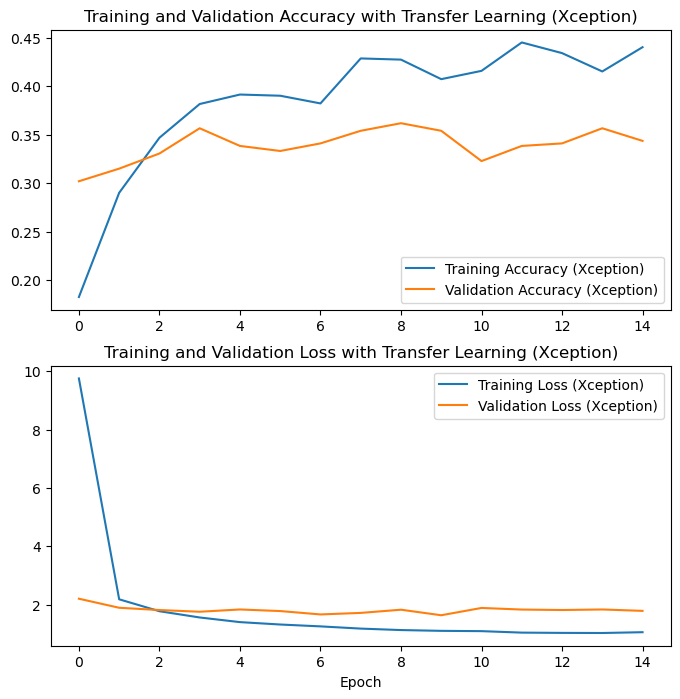

In [19]:
# Evaluation of the Xception transferred model
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (Xception): {val_loss_transfer_xception}, Validation accuracy (Xception): {val_acc_transfer_xception}')

# Visualization of the training results with Xception transfer learning
acc_transfer_xception = history_xception.history['accuracy']
val_acc_transfer_xception = history_xception.history['val_accuracy']
loss_transfer_xception = history_xception.history['loss']
val_loss_transfer_xception = history_xception.history['val_loss']

epochs_transfer_xception = range(len(acc_transfer_xception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_xception, acc_transfer_xception, label='Training Accuracy (Xception)')
plt.plot(epochs_transfer_xception, val_acc_transfer_xception, label='Validation Accuracy (Xception)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (Xception)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_xception, loss_transfer_xception, label='Training Loss (Xception)')
plt.plot(epochs_transfer_xception, val_loss_transfer_xception, label='Validation Loss (Xception)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (Xception)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 12s 955ms/step - loss: 1.6987 - accuracy: 0.3646


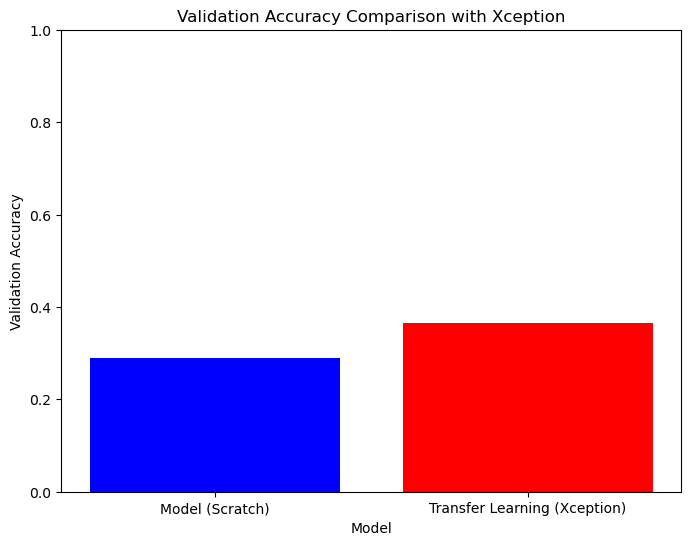

In [20]:
val_loss_scratch, val_acc_scratch = model1.evaluate(validation_generator,
                                                   steps=validation_generator.samples // validation_generator.batch_size)



# Après avoir entraîné le modèle Xception avec transfert d'apprentissage
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)


# Visualization of comparison results for Xception
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (Xception)'], [val_acc_scratch, val_acc_transfer_xception], color=['blue', 'red'])
plt.title('Validation Accuracy Comparison with Xception')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  # Make sure the y-axis starts at 0 and ends at 1 for consistency
plt.show()


## 3. Data Augmentation

In [21]:
#  Préparation des données pour l'entraînement

# Chemin vers le dossier contenant les images croppées
base_dir = 'cropped_train_images'

# Création des générateurs d'images avec augmentation de données pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Utilisation de 20% des données pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Défini pour l'entraînement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images après redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Défini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


Que l'on effectue une rotation, un changement de longueur ou de hauteur, un zoom ou un *flip* horizontal, on ne change pas la classe des images. C'est pour cette raison que l'on peut effectuer ces opérations dans le cadre de la *data augmentation*.

In [22]:
# Recompiler le modèle model1
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Entraînement du modèle
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du modèle

val_loss, val_acc = model1.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

Epoch 1/50
52/52 [==============================] - 43s 782ms/step - loss: 2.1639 - accuracy: 0.2315 - val_loss: 2.1675 - val_accuracy: 0.2578
Epoch 2/50
52/52 [==============================] - 40s 774ms/step - loss: 2.0476 - accuracy: 0.2572 - val_loss: 2.1155 - val_accuracy: 0.2708
Epoch 3/50
52/52 [==============================] - 40s 771ms/step - loss: 1.9875 - accuracy: 0.2749 - val_loss: 2.0913 - val_accuracy: 0.2682
Epoch 4/50
52/52 [==============================] - 40s 764ms/step - loss: 1.9425 - accuracy: 0.2724 - val_loss: 2.1171 - val_accuracy: 0.2552
Epoch 5/50
52/52 [==============================] - 40s 766ms/step - loss: 1.8978 - accuracy: 0.2749 - val_loss: 2.0702 - val_accuracy: 0.2344
Epoch 6/50
52/52 [==============================] - 40s 761ms/step - loss: 1.8788 - accuracy: 0.2914 - val_loss: 2.1369 - val_accuracy: 0.2422
Epoch 7/50
52/52 [==============================] - 40s 764ms/step - loss: 1.8421 - accuracy: 0.2951 - val_loss: 2.0577 - val_accuracy: 0.2839

💬 Remarque et conclusion

**À partir de zéro :**

Avantages :
- Contrôle complet sur l'architecture.
- Aucune dépendance vis-à-vis des modèles préexistants, ce qui peut être bénéfique si les données sont très différentes d'ImageNet.

Inconvénients :
- Nécessite plus de données pour bien généraliser.
- Temps d'entraînement plus longs.
- Souvent, cela aboutit à une précision inférieure par rapport à l'apprentissage par transfert, en particulier avec de petits ensembles de données.

**Apprentissage par transfert avec VGG16 :**

Avantages :
- Bénéficie des poids pré-entraînés sur ImageNet, ce qui aide à la convergence.
- Bon pour apprendre des caractéristiques à partir d'images qui sont quelque peu similaires à ImageNet.
    
Inconvénients :
- Réseau très profond avec de nombreux paramètres, ce qui le rend gourmand en calcul.
- Tend à être plus lent que d'autres modèles comme ResNet ou Inception en raison de sa profondeur.

**Apprentissage par transfert avec ResNet50 :**

Avantages :

- Utilise des connexions résiduelles pour permettre l'entraînement de réseaux très profonds sans dégradation.
- Convergence généralement plus rapide par rapport à VGG16 grâce aux connexions de saut.

Inconvénients :
- Peut être excessif pour des tâches simples ou des ensembles de données très petits.

**Apprentissage par transfert avec InceptionV3 :**

Avantages :
- Utilise un mélange de tailles de filtres pour capturer des informations à diverses échelles.
- Plus efficace en termes de paramètres que VGG16.
    
Inconvénients :
- Une architecture plus complexe peut être plus difficile à adapter à de nouvelles tâches.
- Parfois plus lent à entraîner en raison de la complexité des modules d'inception.

**Apprentissage par transfert avec Xception :**

Avantages :
- Utilise des convolutions séparables en profondeur, qui peuvent être plus efficaces que les convolutions traditionnelles.
- Atteint souvent une précision plus élevée sur les ensembles de données de référence.

Inconvénients :
- Peut nécessiter plus de réglages fins pour adapter les poids pré-entraînés à une nouvelle tâche.
- Peut toujours être gourmand en calcul malgré l'efficacité de ses convolutions.
